<a href="https://colab.research.google.com/github/YukiSato-zz/Money-maker/blob/master/%E6%A0%AA%E4%BE%A1%E4%BA%88%E6%83%B31968.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!pip install tensorflow
!pip install keras
!pip install -U scikit-learn

     |████████████████████████████████| 22.3MB 1.4MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


                open    high     low   close   volume  adjustment
date                                                             
2020-01-06  0.829726  2313.0  2290.0  2296.0  32100.0      2296.0
2020-01-07  0.835137  2332.0  2301.0  2310.0  24500.0      2310.0
2020-01-08  0.825036  2306.0  2284.0  2284.0  37600.0      2284.0
2020-01-09  0.831169  2362.0  2304.0  2340.0  21200.0      2340.0
2020-01-10  0.852453  2363.0  2308.0  2319.0  26900.0      2319.0
...              ...     ...     ...     ...      ...         ...
2021-02-24  0.955267  2674.0  2636.0  2646.0  61800.0      2646.0
2021-02-26  0.960317  2723.0  2657.0  2657.0  43100.0      2657.0
2021-03-03  1.000000  2779.0  2722.0  2753.0  49200.0      2753.0
2021-03-09  0.992063  2768.0  2721.0  2768.0  42700.0      2768.0
2021-03-15  0.992063  2770.0  2740.0  2767.0  31300.0      2767.0

[271 rows x 6 columns]
Index(['open', 'high', 'low', 'close', 'volume', 'adjustment'], dtype='object')


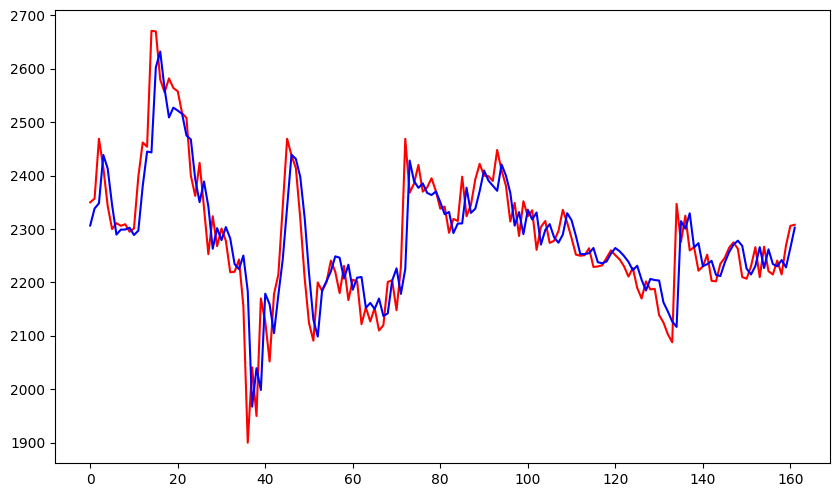

1週間後: 2507.72301274866
2週間後: 2425.337167942507
3週間後: 2450.4178036673293
4週間後: 2511.40358833351


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  

<function matplotlib.pyplot.show>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20870 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20870 missing from current font.
  font.set_text(s, 0, flags=flags)


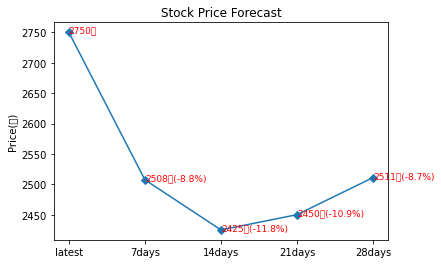

In [67]:
import pandas as pd
data = pd.read_csv('/content/1968_2020_2021.csv',
                 encoding = 'shift-jis',
                 index_col='date',
                 parse_dates=True,
                 dtype='float64').dropna(axis = 1).dropna()

data = data.sort_values("date")
max_num = data['open'].max()
data['open'] /= max_num
open_price = data['open']

train = open_price[:len(open_price) * 7 // 11]
test = open_price[:len(open_price) * 7 // 11:]
learning_term = 10

print(data)
print(data.columns)

import sklearn
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt


def make_data(data, interval=learning_term):
    input_tensor = []
    output_tensor = []
    price_list = list(data)
    for  price_idx in range(len(price_list)):
        if price_idx < interval:
            continue
        output_tensor.append(price_list[price_idx])
        learn_price_list = []
        for week_idx in range(interval):
            learn_week_idx = price_idx + week_idx - interval
            learn_price_list.append(price_list[learn_week_idx])
        input_tensor.append(learn_price_list)
    return input_tensor, output_tensor

x_train, y_train = make_data(train)
x_test, y_test = make_data(train)

lr = LinearRegression(normalize=True) 
lr.fit(x_train, y_train)
y_pre = lr.predict(x_test)

y_pre_array = np.array(y_pre) 
y_pre_array *= max_num 
y_test_array = np.array(y_test)
y_test_array *= max_num
plt.figure(figsize=(10,6), dpi=100)
plt.plot(y_test_array, c='r')
plt.plot(y_pre_array, c='b')
plt.show()

predict_list = []

for i in range(4):
    x_pre = []
    x_pre.append(open_price[-1:-learning_term-1:-1])
    y_predict_small = lr.predict(x_pre)
    predict_list.append(y_predict_small * max_num)
    open_price = list(open_price)
    open_price.append(y_predict_small)
    open_price = pd.Series(open_price)

    print("{}週間後: {}".format(i+1, predict_list[i][0]))
    latest_price = open_price[-5::].values[0] * max_num

rate_list = [""]
x = ["latest","7days", "14days", "21days", "28days"]
y = [latest_price]
for j in range(4):
    rate = (predict_list[j][0] - latest_price) / latest_price
    rate_round = round(rate * 100, 1)
    rate_list.append("(" + str(rate_round) + "%)")
    y.append(predict_list[j][0])

plt.figure()
plt.title("Stock Price Forecast")
plt.ylabel("Price(円)")
plt.plot(x, y, marker="D")
for(i, j, k) in zip(x,y,rate_list):
    detail_msg = str(int(round(j))) + '円' + k
    plt.annotate(detail_msg, xy=(i, j -1), size=9, color="red")
plt.show


In [68]:
data.head()

,open,high,low,close,volume,adjustment
date,,,,,,
2020-01-06,0.829726,2313.0,2290.0,2296.0,32100.0,2296.0
2020-01-07,0.835137,2332.0,2301.0,2310.0,24500.0,2310.0
2020-01-08,0.825036,2306.0,2284.0,2284.0,37600.0,2284.0
2020-01-09,0.831169,2362.0,2304.0,2340.0,21200.0,2340.0
2020-01-10,0.852453,2363.0,2308.0,2319.0,26900.0,2319.0
